![MLU Logo](../../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 1</a>


## Final Project

The goal of the final project is to train a neural networks model for a binary classification between images of:
* software (sw), and
* video games (vg)

You can use the __MLA-CV-Lecture1-CNN.ipynb__ notebook as a starting point to build your model. We will go through the following topics:

1. <a href="#1">Loading data</a>      
2. <a href="#2">Training and Validation</a>
3. <a href="#3">Making predictions</a>
    

Let's import all the libraries. Before that, make sure you have installed the required version mxnet and d2l library as below.

In [1]:
import os
import torch
import torchvision
from torch import nn
from torchvision import transforms

## 1. <a name="1">Loading data</a>
(<a href="#0">Go to top</a>)

Your final project dataset is stored under the __"final_project_dataset"__ folder within the __"data"__ folder. Over there you will see the __train__, __val__ (for validation) and __test__ folders. Let's start creating the data transforms and loaders below. In this project, images come in different sizes and we will resize them to 224x224.

In [2]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0,0,0), std=(1,1,1))
])

transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0,0,0), std=(1,1,1))
])

batch_size = 16

path = '../../data/final_project_dataset'
train_path = os.path.join(path, 'train')
val_path = os.path.join(path, 'val')

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(train_path, transform=transform_train),
    batch_size=batch_size, shuffle=True)

validation_loader = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(val_path, transform=transform_test),
    batch_size=batch_size, shuffle=False)

Let's see some sample pictures.

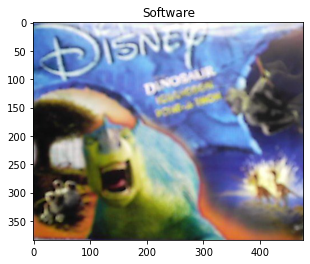

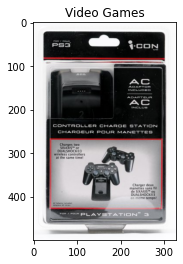

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

im1 = imread(train_path + "/sw/0.jpg")
im2 = imread(train_path + "/vg/0.jpg")

plt.imshow(im1)
plt.title("Software")
plt.show()
plt.imshow(im2)
plt.title("Video Games")
plt.show()

## 2. <a name="2">Training and Validation</a>
(<a href="#0">Go to top</a>)


In [4]:
cnn = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Dropout2d(0.2),
    nn.Flatten(),
    nn.Linear(110*110*16, 128),
    nn.ReLU(),
    nn.Linear(128, 2))

In [5]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.005)
epochs = 10

In [6]:
for epoch in range(epochs):
    
    train_loss, val_loss, train_acc, valid_acc = 0., 0., 0., 0.
    
    for i, (data, label) in enumerate(train_loader):
        optimizer.zero_grad()
        output = cnn(data)
        loss = criterion(output, label)
        loss.backward()
        train_acc += (output.argmax(axis=1) == label.float()).float().mean()
        train_loss += loss
        optimizer.step()
    
    for i, (data, label) in enumerate(validation_loader):
        output = cnn(data)
        valid_acc += (output.argmax(axis=1) == label.float()).float().mean()
        val_loss += criterion(output, label)
        
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    val_loss /= len(validation_loader)
    valid_acc /= len(validation_loader)
    
    print("Epoch %d: train loss %.3f, train acc %.3f, val loss %.3f, val acc %.3f" % (
        epoch+1, train_loss, train_acc,
        val_loss, valid_acc))

Epoch 1: train loss 0.692, train acc 0.516, val loss 0.668, val acc 0.697
Epoch 2: train loss 0.674, train acc 0.582, val loss 0.639, val acc 0.644
Epoch 3: train loss 0.654, train acc 0.608, val loss 0.612, val acc 0.736
Epoch 4: train loss 0.631, train acc 0.642, val loss 0.594, val acc 0.683
Epoch 5: train loss 0.614, train acc 0.669, val loss 0.599, val acc 0.663
Epoch 6: train loss 0.566, train acc 0.719, val loss 0.601, val acc 0.688
Epoch 7: train loss 0.565, train acc 0.720, val loss 0.636, val acc 0.649
Epoch 8: train loss 0.552, train acc 0.736, val loss 0.580, val acc 0.707
Epoch 9: train loss 0.530, train acc 0.739, val loss 0.571, val acc 0.683
Epoch 10: train loss 0.503, train acc 0.769, val loss 0.593, val acc 0.654


## 3. <a name="3">Making predictions</a>
(<a href="#0">Go to top</a>)


In [7]:
test_path = os.path.join(path, 'test')

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(test_path, transform=transform_train),
    batch_size=batch_size, shuffle=True)

In [8]:
def check_accuracy(loader, model):
    correct = 0
    total = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            
            scores = model(x)
            _, predictions = scores.max(1)
            correct += (predictions == y).sum()
            total += predictions.size(0)
        
    print('Acc: ', (correct/total).item()) 

In [9]:
check_accuracy(test_loader, cnn)

Acc:  0.6600000262260437
